# Scientific computing with numpy

**References**:
+ https://numpy.org/doc/stable/index.html

**Content**:
+ Numpy
    + What is an array / characteristics
    + concatenating and stacking arrays
    + indexing of arrays
    + adding (empty) dimensions to your array
    + basic array operations
    + broadcasting
    + further useful numpy operations
    + generating random numbers
    + getting help
    + exercises

## Numpy
+ [NumPy](https://numpy.org/) is a package for scientific computing in Python.
+ it is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.
+ find the [API under this link](https://numpy.org/doc/stable/reference/)
+ convention is to import numpy as follows: ``import numpy as np`` 
+ ``np.array`` vs. python ``list``
    + While a Python list can contain different data types within a single list, all of the elements in a NumPy array should be homogeneous
    + NumPy arrays are faster and more compact than Python lists
    + An array consumes less memory
 
### What is an array?
+ An array is a grid of values and it contains information about
    + the raw data,
    + how to locate an element, and
    + how to interpret an element.
+ The elements are all of the same type, referred to as the **array dtype**.
+ The **rank of the array** is the number of dimensions.
+ The **shape of the array** is a tuple of integers giving the size of the array along each dimension.
+ We can access the elements in the array using square brackets.

**Shape of an array**

<img src="https://www.w3resource.com/w3r_images/numpy-1d2d3d-array.png" width="600"/>

**Array attributes**:

In [1]:
import numpy as np
# create a numpy array
a = np.array([1,2,3], dtype = np.int32)

# type of elements in numpy array
print(a.dtype)

# number of dimensions
print(a.ndim)

# number of elements along each dimension
print(a.shape)

# total number of elements of the array
print(a.size)

# access an element from the array
print(a[0])

int32
1
(3,)
3
1


+ Numpy comes with a lot of useful functions that make computation easier:
    + create **special matrices** filled with zeros, ones; identity matrices
    + create **ranges** of various types
    + easy **sorting** of numbers in an array

In [2]:
# create an array filled with ... zeros
print(np.zeros(shape=(2,2)))

# ... ones
print(np.ones(shape=(3)))

# or with both, i.e. an identity matrix
print(np.eye(N=3))  # N-rows (and cols)

# a range of elements
print(np.arange(4))         # start=0, stop, step=1
print(np.arange(4, 8, 1))   # start, stop, step

# array with values that are spaced linearly in a specified interval
print(np.linspace(start = 0,  stop = 10, num = 5, endpoint = True))

# sort numbers in ascending order 
b = np.linspace(start=10, stop=0, num=11)
np.sort(b)

[[0. 0.]
 [0. 0.]]
[1. 1. 1.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[0 1 2 3]
[4 5 6 7]
[ 0.   2.5  5.   7.5 10. ]


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

### Concatenating / stacking arrays
+ often you have two or more arrays that you want to *concatenate/stack* into a single array
+ `np.stack`
    + Join a sequence of arrays along a new axis
    + each array must have the same shape
+ `np.concatenate`
    + Join a sequence of arrays along an existing axis. 
+ when joining arrays an important consideration is their shape

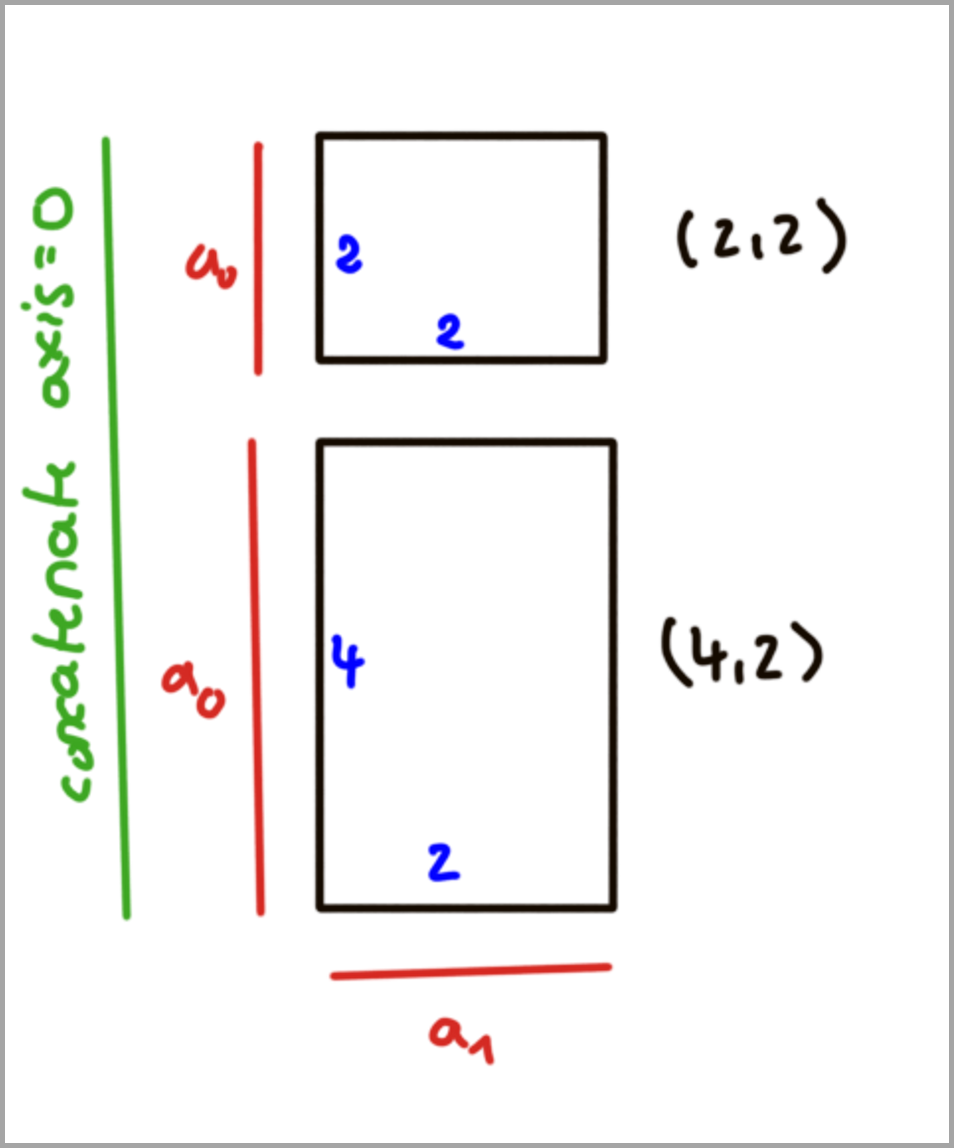

In [10]:
from IPython.display import Image
from IPython.core.display import HTML 

PATH = "graphics/"
Image(filename = PATH + "numpy_shape1.png", width=300)

In [15]:
# concatenate two arrays
a = np.ones((2,2))
b = np.ones((4,2))*2
print(a)
print(a.shape)
print(b)
print(b.shape)

np.concatenate((b,a), axis = 0)

[[1. 1.]
 [1. 1.]]
(2, 2)
[[2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]]
(4, 2)


array([[2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [1., 1.],
       [1., 1.]])

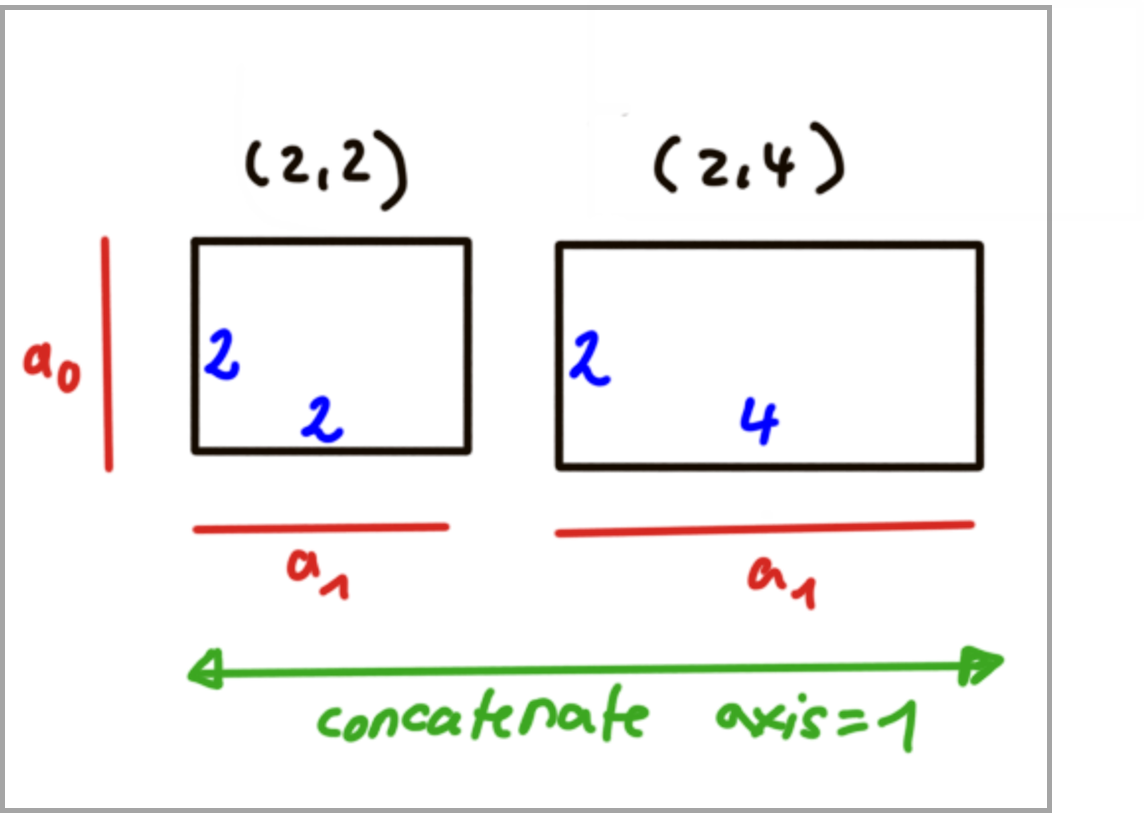

In [9]:
Image(filename = PATH + "numpy_shape2.png", width=300)

In [32]:
# transpose an array
b_t = np.transpose(b)
print(b_t)
print(b_t.shape)

# concatenate along axis=1
np.concatenate((a, b_t), axis = 1)

[[2. 2. 2. 2.]
 [2. 2. 2. 2.]]
(2, 4)


array([[1., 1., 2., 2., 2., 2.],
       [1., 1., 2., 2., 2., 2.]])

In [22]:
# alternatively 
# vertical stacking
stack_vert = np.vstack((a,b))
print(stack_vert)
print(stack_vert.shape)

# horizontal stacking
stack_horz = np.hstack((a,b_t))
print(stack_horz)
print(stack_horz.shape)

[[1. 1.]
 [1. 1.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]]
(6, 2)
[[1. 1. 2. 2. 2. 2.]
 [1. 1. 2. 2. 2. 2.]]
(2, 6)


In [59]:
# use np.stack
b = np.ones(a.shape)*3
c = np.ones(a.shape)*5
print(a)
print(b)
print(c)

# print shapes
print(a.shape)
print(b.shape)
print(c.shape)

# stack along a new 'last' dimension
stack_last = np.stack((a,b,c), axis=-1)
print(stack_last)
print(stack_last.shape)

# stack along a new 'first' dimension
stack_first = np.stack((a,b,c), axis=0)
print(stack_first)
print(stack_first.shape)

[[1. 1.]
 [1. 1.]]
[[3. 3.]
 [3. 3.]]
[[5. 5.]
 [5. 5.]]
(2, 2)
(2, 2)
(2, 2)
[[[1. 3. 5.]
  [1. 3. 5.]]

 [[1. 3. 5.]
  [1. 3. 5.]]]
(2, 2, 3)
[[[1. 1.]
  [1. 1.]]

 [[3. 3.]
  [3. 3.]]

 [[5. 5.]
  [5. 5.]]]
(3, 2, 2)


### Indexing of arrays
+ you can inspect the single dimensions of an array by using indexing notation
+ consider an array of shape (2,2,3)

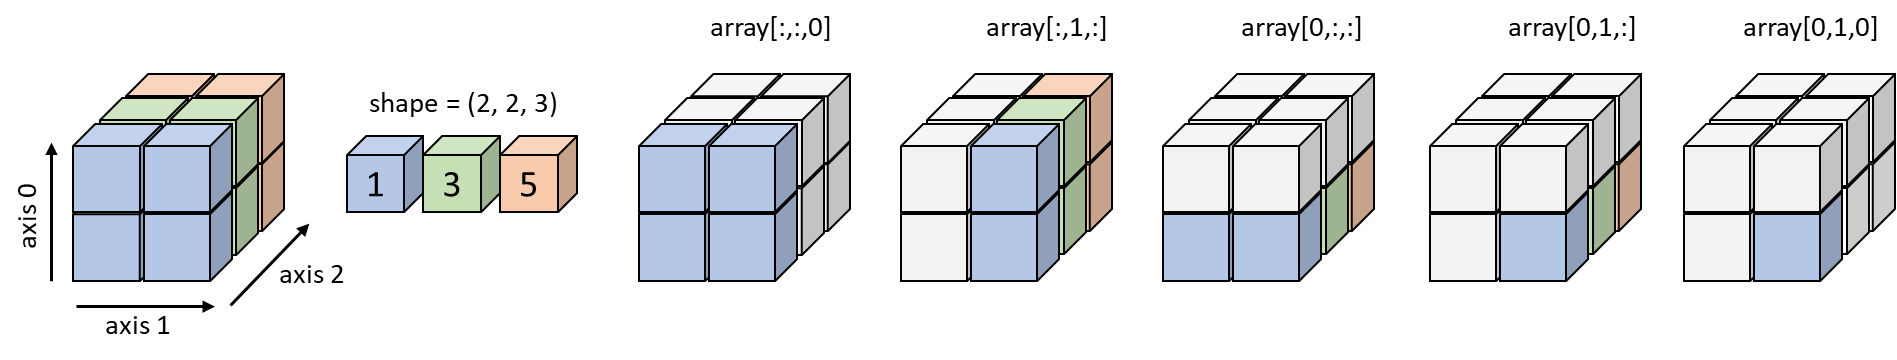

In [58]:
Image(filename = PATH + "stacking1.png", width=1000)

In [68]:
# have a look at the first and second dimension / fix last one
# graphically: we look at the blue slice
print(stack_last[:,:,0])
print(stack_last[:,:,1])
print(stack_last[:,:,2])

# fix the second dimension 
# graphically: we look at the right slice 
print(stack_last[:,1,:])

# fix the first dimension 
# graphically: we look at the bottom slice
print(stack_last[0,:,:])

# fix all dimensions
# graphically: we look at one cube
print(stack_last[0,1,0])

# create a new array
a = np.array([np.arange(5), np.arange(5,10)])
print(a) 

# select only values from a that are smaller 5
print(a[a < 5])

# select only even elements in a
print(a[a%2==0])

# select elements between 3 and 6
print(a[(a >= 3) & (a <= 6)])

# any boolean array would work for indexing
boolean_mask = (a >= 3) & (a <= 6)
print(boolean_mask)

# apply mask to array
print(a[boolean_mask])

[[1. 1.]
 [1. 1.]]
[[3. 3.]
 [3. 3.]]
[[5. 5.]
 [5. 5.]]
[[1. 3. 5.]
 [1. 3. 5.]]
[[1. 3. 5.]
 [1. 3. 5.]]
1.0
[[0 1 2 3 4]
 [5 6 7 8 9]]
[0 1 2 3 4]
[0 2 4 6 8]
[3 4 5 6]
[[False False False  True  True]
 [ True  True False False False]]
[3 4 5 6]


### Adding (empty) dimensions to your array
+ sometimes you want to add an "empty" dimension to your array
+ e.g. from (1,) to (1,1) or from (3,2) to (3,2,1)
+ possible functions for doing this are: `np.newaxis` and `np.expand_dims`

In [63]:
a = np.array([np.arange(5), np.arange(5,10)])
print(a.shape)

# add a new dimension such that we get as shape (2,5,1)
a2 = a[:,:,np.newaxis]
print(a2.shape)

# add a new dimension such that we get as shape (2,1,5)
a2 = a[:,np.newaxis,np.newaxis,np.newaxis,:]
print(a2.shape)

# another possibility is to use expand_dims
print(np.expand_dims(a, axis = -1).shape)
print(np.expand_dims(a, axis = 1).shape)
print(np.expand_dims(a, axis = (0,1)).shape)

(2, 5)
(2, 5, 1)
(2, 1, 1, 1, 5)
(2, 5, 1)
(2, 1, 5)
(1, 1, 2, 5)


**Reshaping an array**

In [74]:
a = np.arange(6)
print(a)

# reshape 1D array to 3x2 matrix
a_reshaped = a.reshape(3, 2) 

print(a_reshaped)
print(a_reshaped.shape)

[0 1 2 3 4 5]
[[0 1]
 [2 3]
 [4 5]]
(3, 2)


### Basic array operations
+ sum, difference, (elementwise) product, division
+ matrix multiplication

In [90]:
A = np.array([[1, 2],[3, 4]])
B = np.ones(2, dtype=int)*2

print(A)
print(B)

# sum
print(A + B)

# difference
print(A - B)

# multiplication
print(A * B)

# divison
print(A / B)

# sum of the elements in an array
print(A.sum())
print(A.sum(axis=1))

# how about matrix multiplication?
np.matmul(A,B)
# or simply...
A @ B

[[1 2]
 [3 4]]
[2 2]
[[3 4]
 [5 6]]
[[-1  0]
 [ 1  2]]
[[2 4]
 [6 8]]
[[0.5 1. ]
 [1.5 2. ]]
10
[3 7]


array([ 6, 14])

### Broadcasting
+ sometimes you want to carry out an operation between an array and a single number or between arrays of two different sizes
+ however there are a lot of functions that need arrays of the same shape
+ then broadcasting is a useful way of handling this situation
+ The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.
+ Consider the following example:
    + multiplication of a scalar with a vector (`a*B`)
    + NumPy understands that the multiplication should happen with each cell.
    + therefore it "stretches" `a` during the arithmetic operation into an array with the same shape as `B`.
+ you can broadcast an array to the desired shape using `np.broadcast_to`

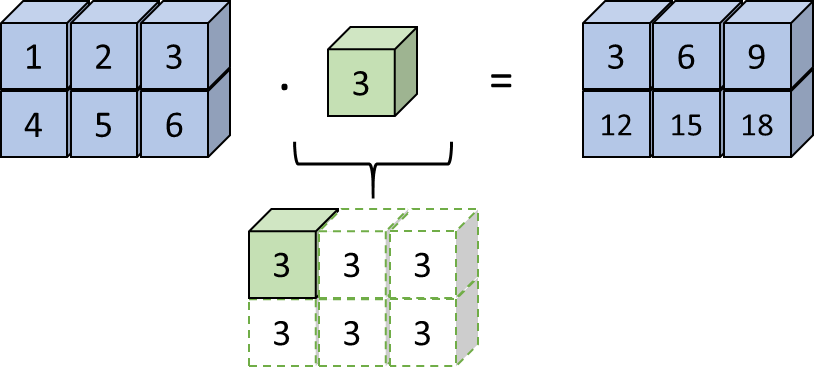

In [94]:
Image(filename = PATH + "broadcasting.png", width=400)

In [99]:
# create a scalar and a matrix
a = 3.
B = np.array([[1,2,3],[4,5,6]])
# element-wise multiplication
print(a*B)

# matrix multiplication
#a @ B # ValueError (dimensions are not equal)

# create a matrix out of '3' of appropriate shape in order to use matrix multiplication
np.broadcast_to(a, (3,2)) @ B

array([[15., 21., 27.],
       [15., 21., 27.],
       [15., 21., 27.]])

### Further useful operations using numpy

In [125]:
a = np.array([[1,2,3],[4,5,6]])

# get minimum value in an array
print( a.min() )

# get maximum value in an array
print( a.max() )

# get mean, median, percentile of an array
print( np.mean(a) )
print( np.median(a) )
print( np.percentile(a, 50) )
print( np.percentile(a, 1) )

# get unique elements of an array
b = np.array([1,1,2,3,4,4,4])
np.unique(b)

# get elements and indices
unique_array, index = np.unique(b, return_index=True)
print(unique_array)
print(index)

# reverse an array
reversed_arr = np.flip(b)
print( reversed_arr )

# flatten multidimensional arrays
x = np.array([[1 , 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(x)
x_flatten = x.flatten()
print(x_flatten)

1
6
3.5
3.5
3.5
1.05
[1 2 3 4]
[0 2 3 4]
[4 4 4 3 2 1 1]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


### Random number generation
+ The `numpy.random` module implements pseudo-random number generators (PRNGs or RNGs, for short) with the ability to draw samples from a variety of probability distributions.
+ In general, users will create a `Generator` instance with `default_rng` and call the various methods on it to obtain samples from different distributions.

In [118]:
rng = np.random.default_rng()

# Generate 3 random floats uniformly distributed over the range [0, 1)
print( rng.random(3) )

# Generate an array of 3 numbers according to a standard Gaussian distribution.
print( rng.standard_normal(3) )

# Generate 10 random integers over the range [0, 5)
print( rng.integers(5, size=10) )

[0.88900695 0.57827273 0.46376505]
[-0.11297261 -1.4883879   1.3451406 ]
[2 1 2 1 2 4 3 2 4 1]


### Need help: How to access the docstring
+ to get help you can use
    + `help` to access the docstring,
    + `?` as a shorthand for accessing the documentation along with other relevant information
    + `??` to access the source code.

In [135]:
help(np.log)

Help on ufunc:

log = <ufunc 'log'>
    log(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])
    
    Natural logarithm, element-wise.
    
    The natural logarithm `log` is the inverse of the exponential function,
    so that `log(exp(x)) = x`. The natural logarithm is logarithm in base
    `e`.
    
    Parameters
    ----------
    x : array_like
        Input value.
    out : ndarray, None, or tuple of ndarray and None, optional
        A location into which the result is stored. If provided, it must have
        a shape that the inputs broadcast to. If not provided or None,
        a freshly-allocated array is returned. A tuple (possible only as a
        keyword argument) must have length equal to the number of outputs.
    where : array_like, optional
        This condition is broadcast over the input. At locations where the
        condition is True, the `out` array will be set to the ufunc result.
        Elsewhere, t

In [142]:
def test_function(a,b):
    """This is the documentation of the function"""
    c = a+b
    print(c)

# get docstring and other relevant information
test_function?

Signature: test_function(a, b)
Docstring: This is the documentation of the function
File:      c:\users\bockting\appdata\local\temp\ipykernel_16728\382634795.py
Type:      function

In [141]:
# get additionally the source code
test_function??

Signature: test_function(a, b)
Source:   
def test_function(a,b):
    """This is the documentation of the function"""
    c = a+b
    print(c)
File:      c:\users\bockting\appdata\local\temp\ipykernel_16728\3050024773.py
Type:      function

### Exercises
+ collection of exercises provided by [Nicolas P. Rougier](https://github.com/rougier)
+ [100 Numpy exercises](https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises.ipynb)
+ Do as many as you want; you can select the exercises according to your preferred difficulty (as indicated by the stars at the end of each task)